# Analise de dados Steam - v2.0 Reboot
Optamos por refazer nosso projeto do zero, pois já havia outro grupo trabalhando com o mesmo DataFrame, e também porque o grupo, coletivamente, não gostou muito das possibilidades de análise oferecidas pelo CSV que iríamos utilizar. Nesse sentido, buscamos dados que consideramos mais interessantes para realizar análises, ainda sobre o mesmo tema – jogos da Steam. Decidimos usar como recorte os mil jogos mais bem avaliados da Steam. Esses dados foram relativamente fáceis de encontrar, já que a Steam os divulga publicamente, ao contrário dos dados de venda, que são mantidos em segredo pelas empresas que produzem os jogos. Já dados de avaliação são disponibilizados ao público pela Steam, e existem organizações como a SteamDB que compila esses dados através da API oficial da Steam. 

## Fonte de Dados: SteamDB
Pudemos observar através do SteamDB esses mil jogos mais bem avaliados em relação à proporção de avaliações positivas e negativas deixadas pela comunidade da Steam. No entanto, não havia no Kaggle ou em sites similares um CSV com essas informações. Pesquisando um pouco, e com os ensinamentos da aula de Introdução a Computação, observamos que era possivel obter esses dados através de Webscraping, e assim o fizemos: utilizando a biblioteca BeautifulSoup4 foi possível extrair os dados facilmente do site (código disponível em ./Extras/webscraping/raspagem_steamdb_bs4) o site requeria login para acessar a visualização sem restrição dos mil jogos. Com uma rápida sacada foi fácil burlar esse requerimento, a solução era simples: baixar a a página da Web enquanto logado através do usuário da Steam no SteamDB... e funcionou! Como as informações estavam diretamente escritas no código fonte da página, não apresentou nenhum problema maior. Foi apenas criar um laço e indicar as tags seletoras do CSS responsáveis por cada dado específico, enquanto escrevia num arquivo json o rank, nome do jogo, avaliações positivas/negativas, total de reviews e a porcentagem da avaliação.

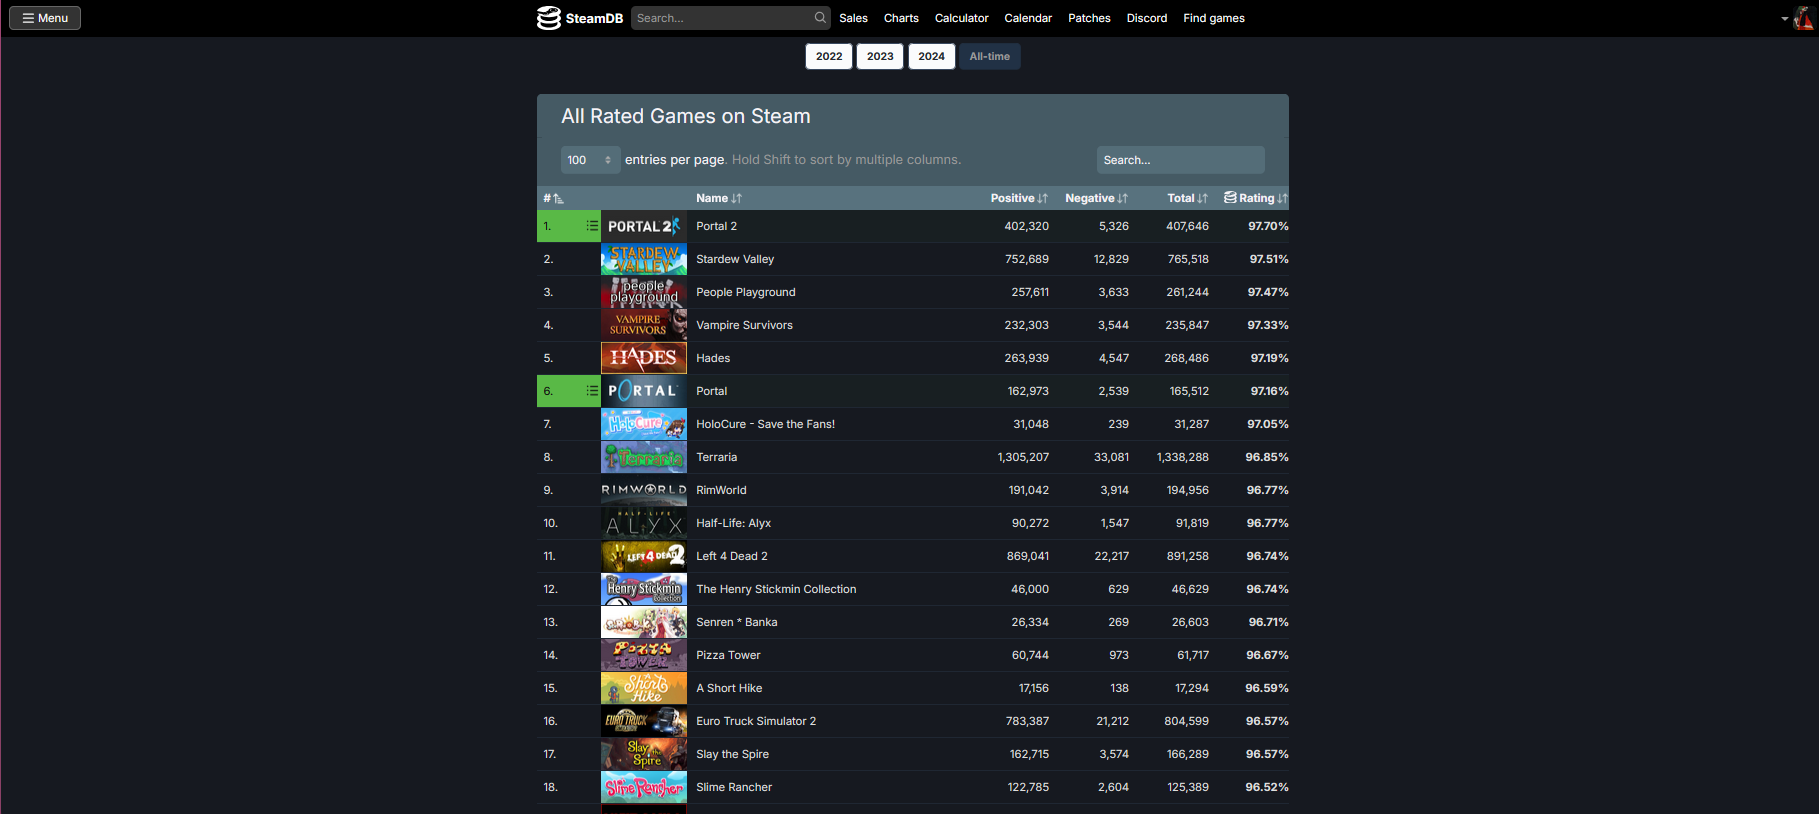

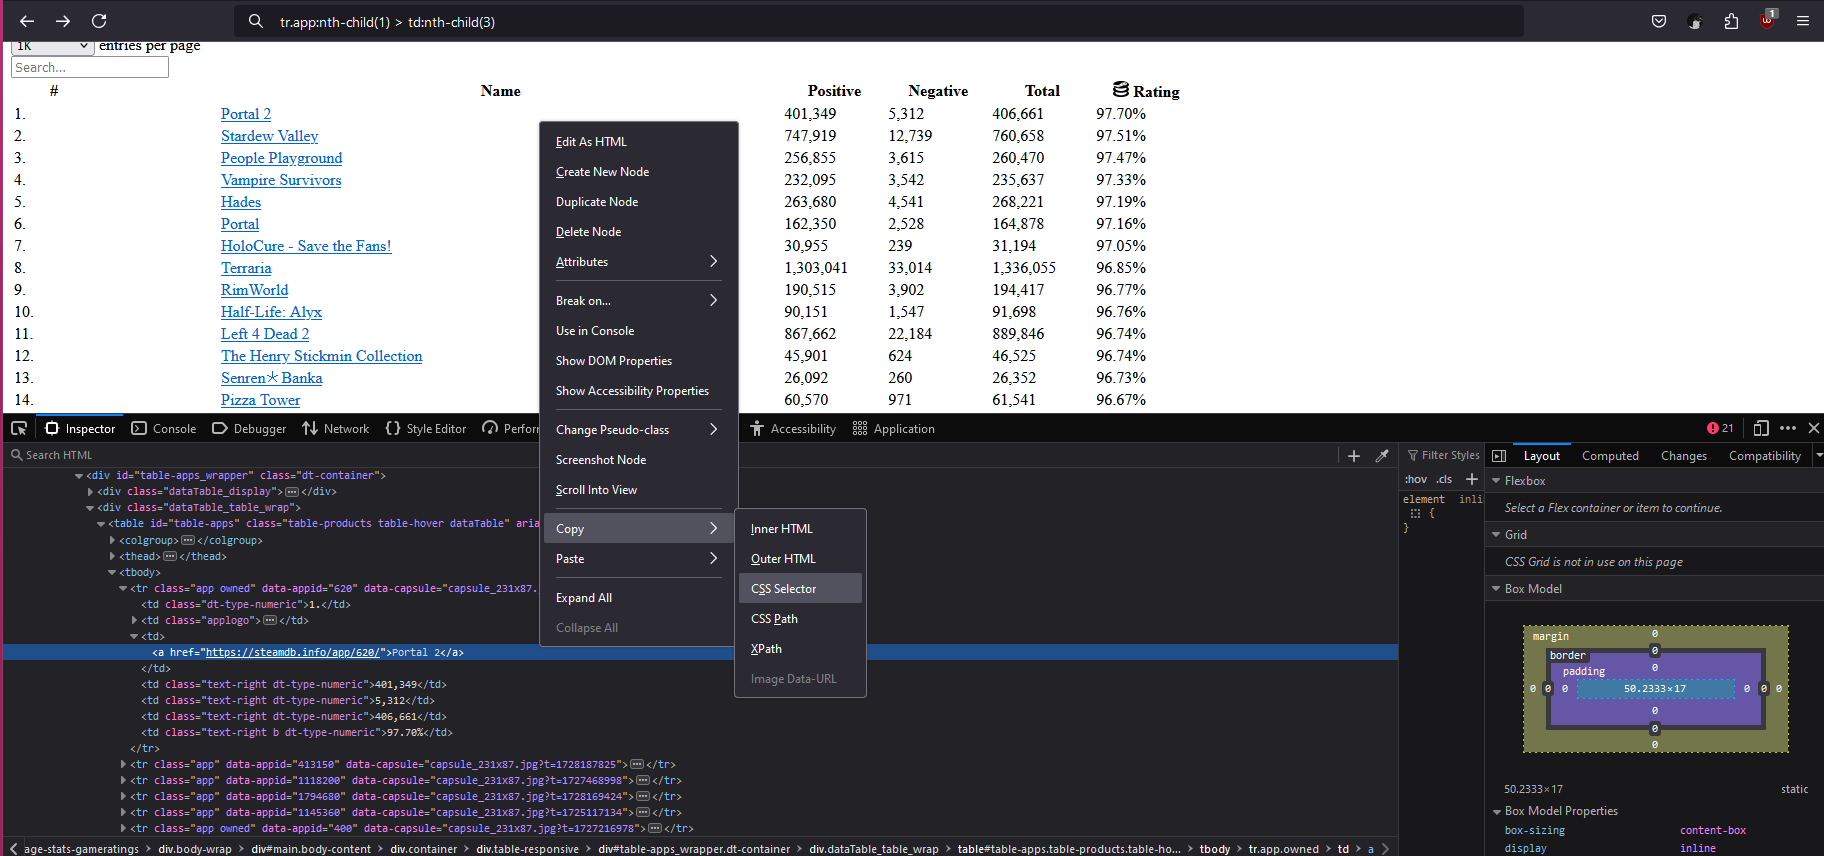

In [11]:
import IPython
from IPython.display import Image, display
display(Image(filename='steamdb2.png'))
display(Image(filename='steamdb.png'))

In [ ]:
from bs4 import BeautifulSoup  
import json

html_file_path = 'steamdb.htm'

with open(html_file_path, 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')  
all_games_data = []

rows = soup.select('tr.app')  

# iterar para pegar todas as informações
for i in range(1000):
    if i < len(rows):
        row = rows[i]  

        rank_number = row.select_one('td.dt-type-numeric').text
        game_name = row.select_one('td:nth-child(3) > a:nth-child(1)').text
        positive_ratings = row.select_one('td:nth-child(4)').text
        negative_ratings = row.select_one('td:nth-child(5)').text
        total_reviews = row.select_one('td:nth-child(6)').text
        rating_percentage = row.select_one('td:nth-child(7)').text

        # Entrada de dicionario para escrever no json
        new_entry = {
            'rank': rank_number,
            'name': game_name,
            'positive ratings': positive_ratings,
            'negative ratings': negative_ratings,
            'total reviews': total_reviews,
            'rating percentage': rating_percentage
        }

        all_games_data.append(new_entry)

json_file_path = '../3_game_ratings.json'

# importante usar encoding utf-8 e ensure_ascii para não quebrar com os jogos em japonês/chinês escritos com kanji
with open(json_file_path, 'w', encoding='utf-8') as json_file:
    json.dump(all_games_data, json_file, ensure_ascii=False, indent=4)  

print(f"Data written to {json_file_path}: {all_games_data}")


## Fonte de dados 2: Internet Game Database (IGDB)
Apesar das informações coletadas serem incentivantes, a partir de uma reflexão do grupo percebemos que esses dados não seriam suficientes para análises mais interessantes. Haja visto que o SteamDB oferece apenas três variáveis: avaliações positivas, negativas e o total. O rating é derivado do quociente entre as avaliações positivas e negativas e o ranking dos ratings mais altos. Nesse sentido, procuramos formas de reunir outras informações sobre esses jogos. A mais simples e copiosamente trabalhosa seria de preencher manualmente informações das mil entradas. Informações que desejavamos eram dados como data de lançamento, em que plataforma foi publicado o jogo, gênero do jogo, se é individual ou multijogador, uma nota mais geral dos críticos para comparar com as reviews da Steam. A segunda opção seria utilizar alguma API para fornecer os dados dos mil jogos em sequência e retornar as informações sobre eles. A segunda opção parecia mais sã e viável, só que dado a inexperiência dos participantes em relação as questões das especificidades das requisições de API, acabou demorando tanto quanto a frugal atividade copiosa de preencher as mil entradas tal qual um monge em um scriptorium medieval. Encontramos algumas opções, entre elas um site chamado [RAWG](https://rawg.io/apidocs) e outro [IGDB](https://api-docs.igdb.com/#getting-started), apesar de ambos terem uma opção gratuita, o IGDB era inteiramente gratuito e olhando sua documentação parecia ser um pouco mais simples e tinha um wrapper escrito em python (o que animou a primeira vista). Acabou que o empacotador era muito rudimentar/não soubemos como utilizar e acabamos por utilizar os requests normalmente através das endpoints. O empacotador mais desenvivolvido pela equipe do IGDB era em javascript, mas ninguém da equipe sabendo bolhufas da lingua decidimos bater a cabeça com python mesmo.

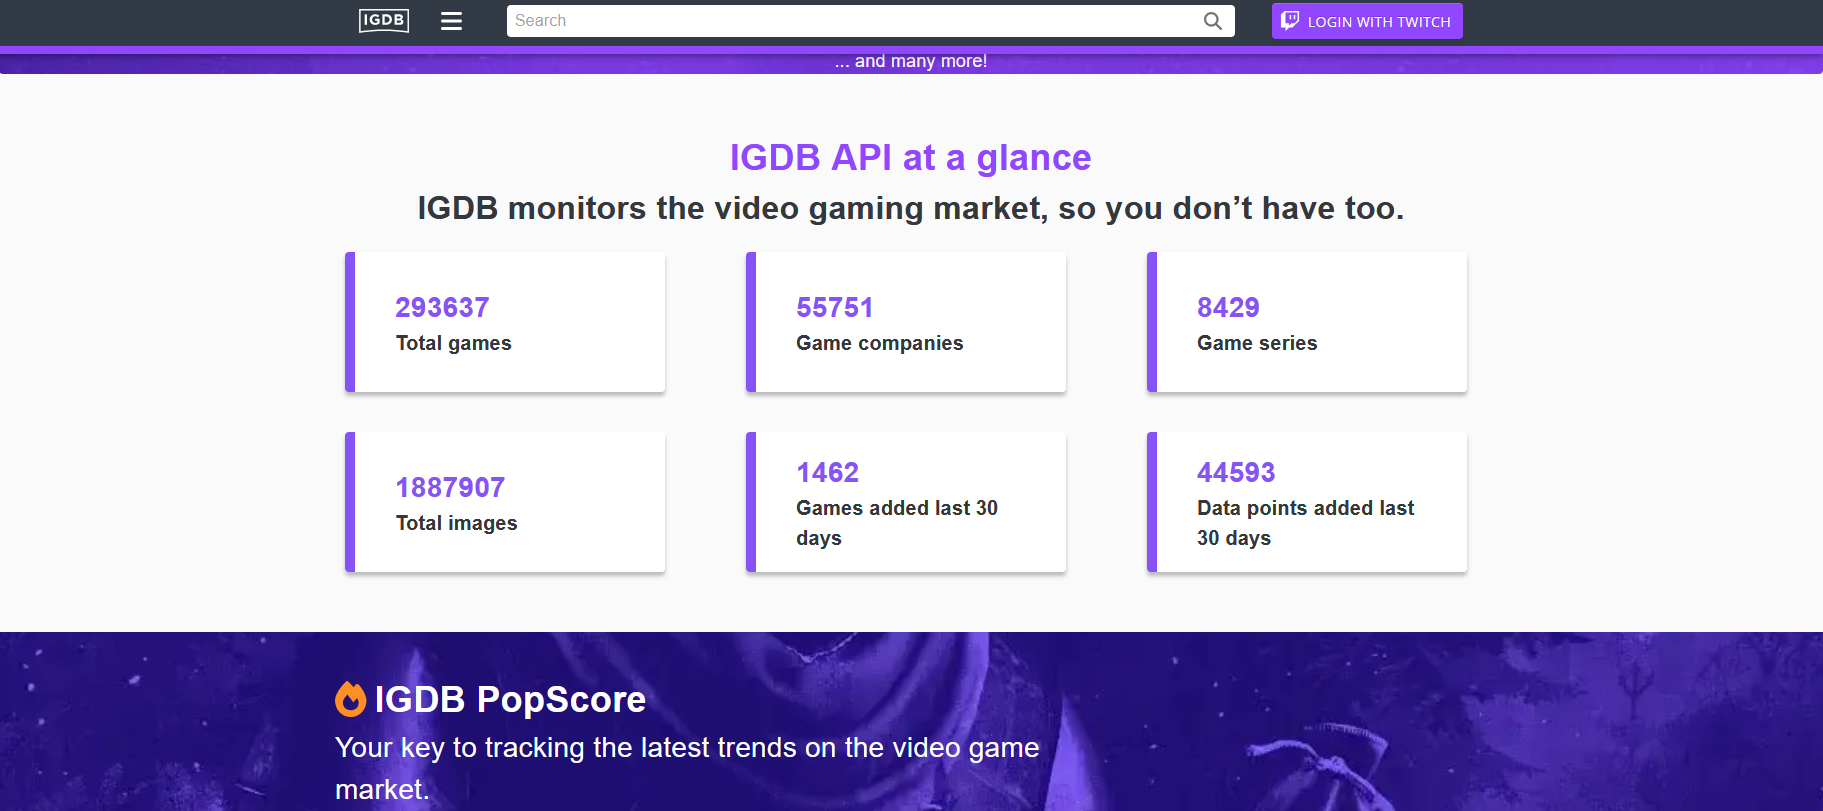

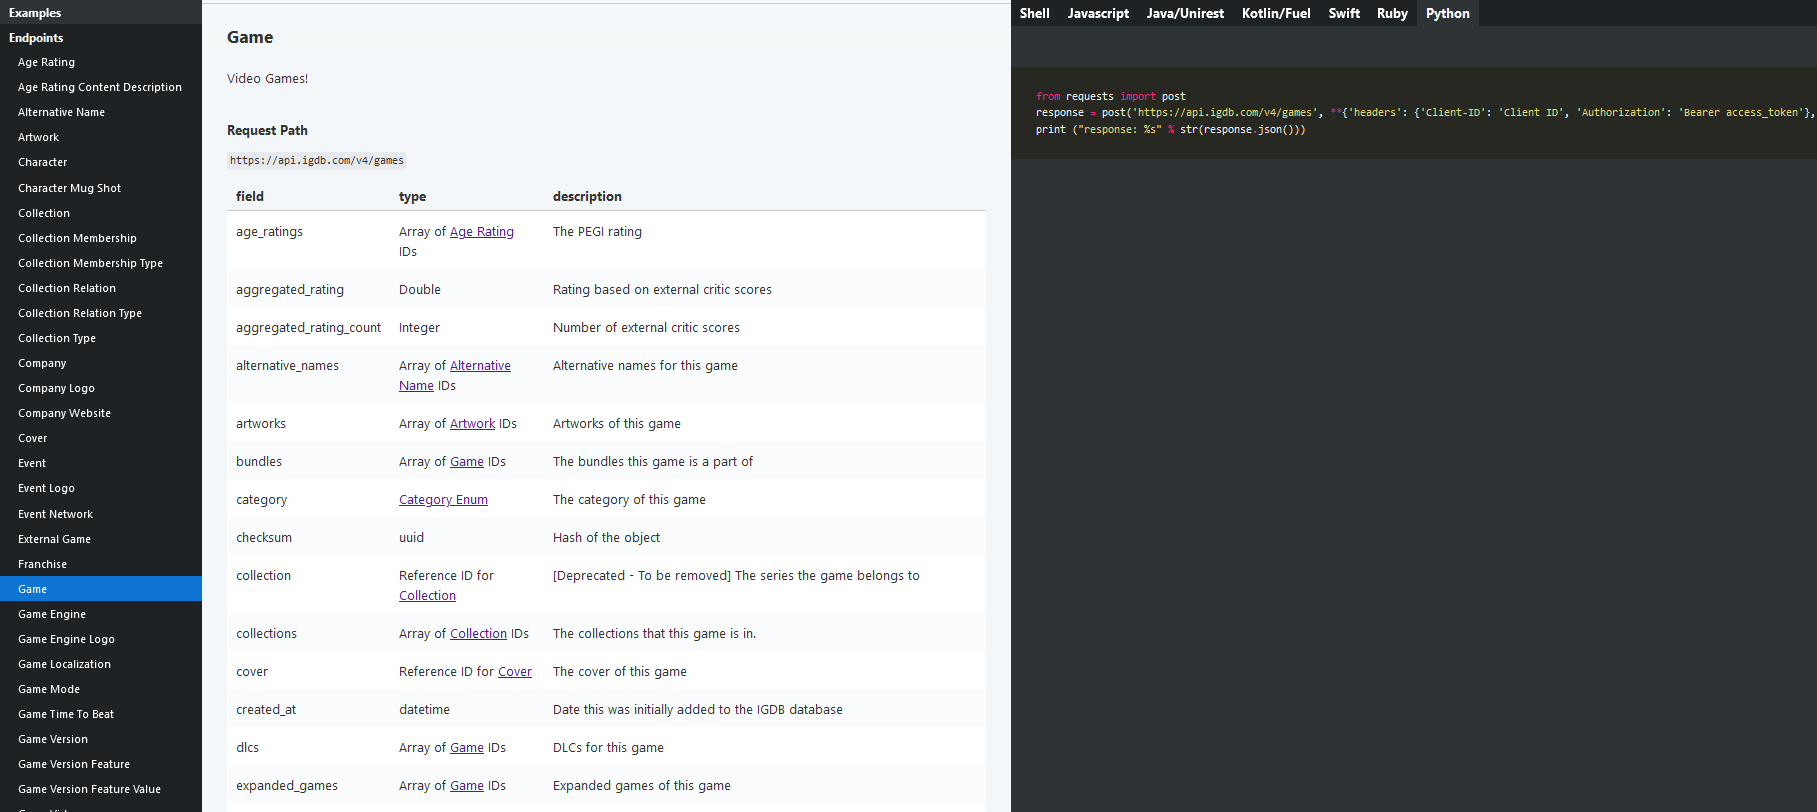

In [13]:
display(Image(filename='igdb.png'))
display(Image(filename='igdb2.png'))